# Import Packages

In [1]:
# Importing Packages 
import numpy as np
import pandas as pd

#Importing packages for cross_validation 
from sklearn.model_selection import cross_val_score

#for modeling 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from collections import Counter

#for feature selection
from sklearn.feature_selection import SelectKBest, f_classif

## Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats

# Read Test and Train Data

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# Exploratory Data Analysis

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [4]:
train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [5]:
train.tail()

ID_code  target    var_0   var_1    var_2   var_3    var_4  \
199995  train_199995       0  11.4880 -0.4956   8.2622  3.5142  10.3404   
199996  train_199996       0   4.9149 -2.4484  16.7052  6.6345   8.3096   
199997  train_199997       0  11.2232 -5.0518  10.5127  5.6456   9.3410   
199998  train_199998       0   9.7148 -8.6098  13.6104  5.7930  12.5173   
199999  train_199999       0  10.8762 -5.7105  12.1183  8.0328  11.5577   

          var_5   var_6    var_7  ...  var_190  var_191  var_192  var_193  \
199995  11.6081  5.6709  15.1516  ...   6.1415  13.2305   3.9901   0.9388   
199996 -10.5628  5.8802  21.5940  ...   4.9611   4.6549   0.6998   1.8341   
199997  -5.4086  4.5555  21.5571  ...   4.0651   5.4414   3.1032   4.8793   
199998   0.5339  6.0479  17.0152  ...   2.6840   8.6587   2.7337  11.1178   
199999   0.3488  5.2839  15.2058  ...   8.9842   1.6893   0.1276   0.3766   

        var_194  var_195  var_196  var_197  var_198  var_199  
199995  18.0249  -1.7939   2.1661   8.5326  16.6660 -17.8661  
199996  22.2717   1.7337  -2.1651   6.7419  15.9054   0.3388  
199997  23.5311  -1.5736   1.2832   8.7155  13.8329   4.1995  
199998  20.4158  -0.0786   6.7980  10.0342  15.5289 -13.9001  
199999  15.2101  -2.4907  -2.2342   8.1857  12.1284   0.1385  

[5 rows x 202 columns]

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [7]:
train.isnull().sum().sum()

0

In [8]:
test.isnull().sum().sum()

0

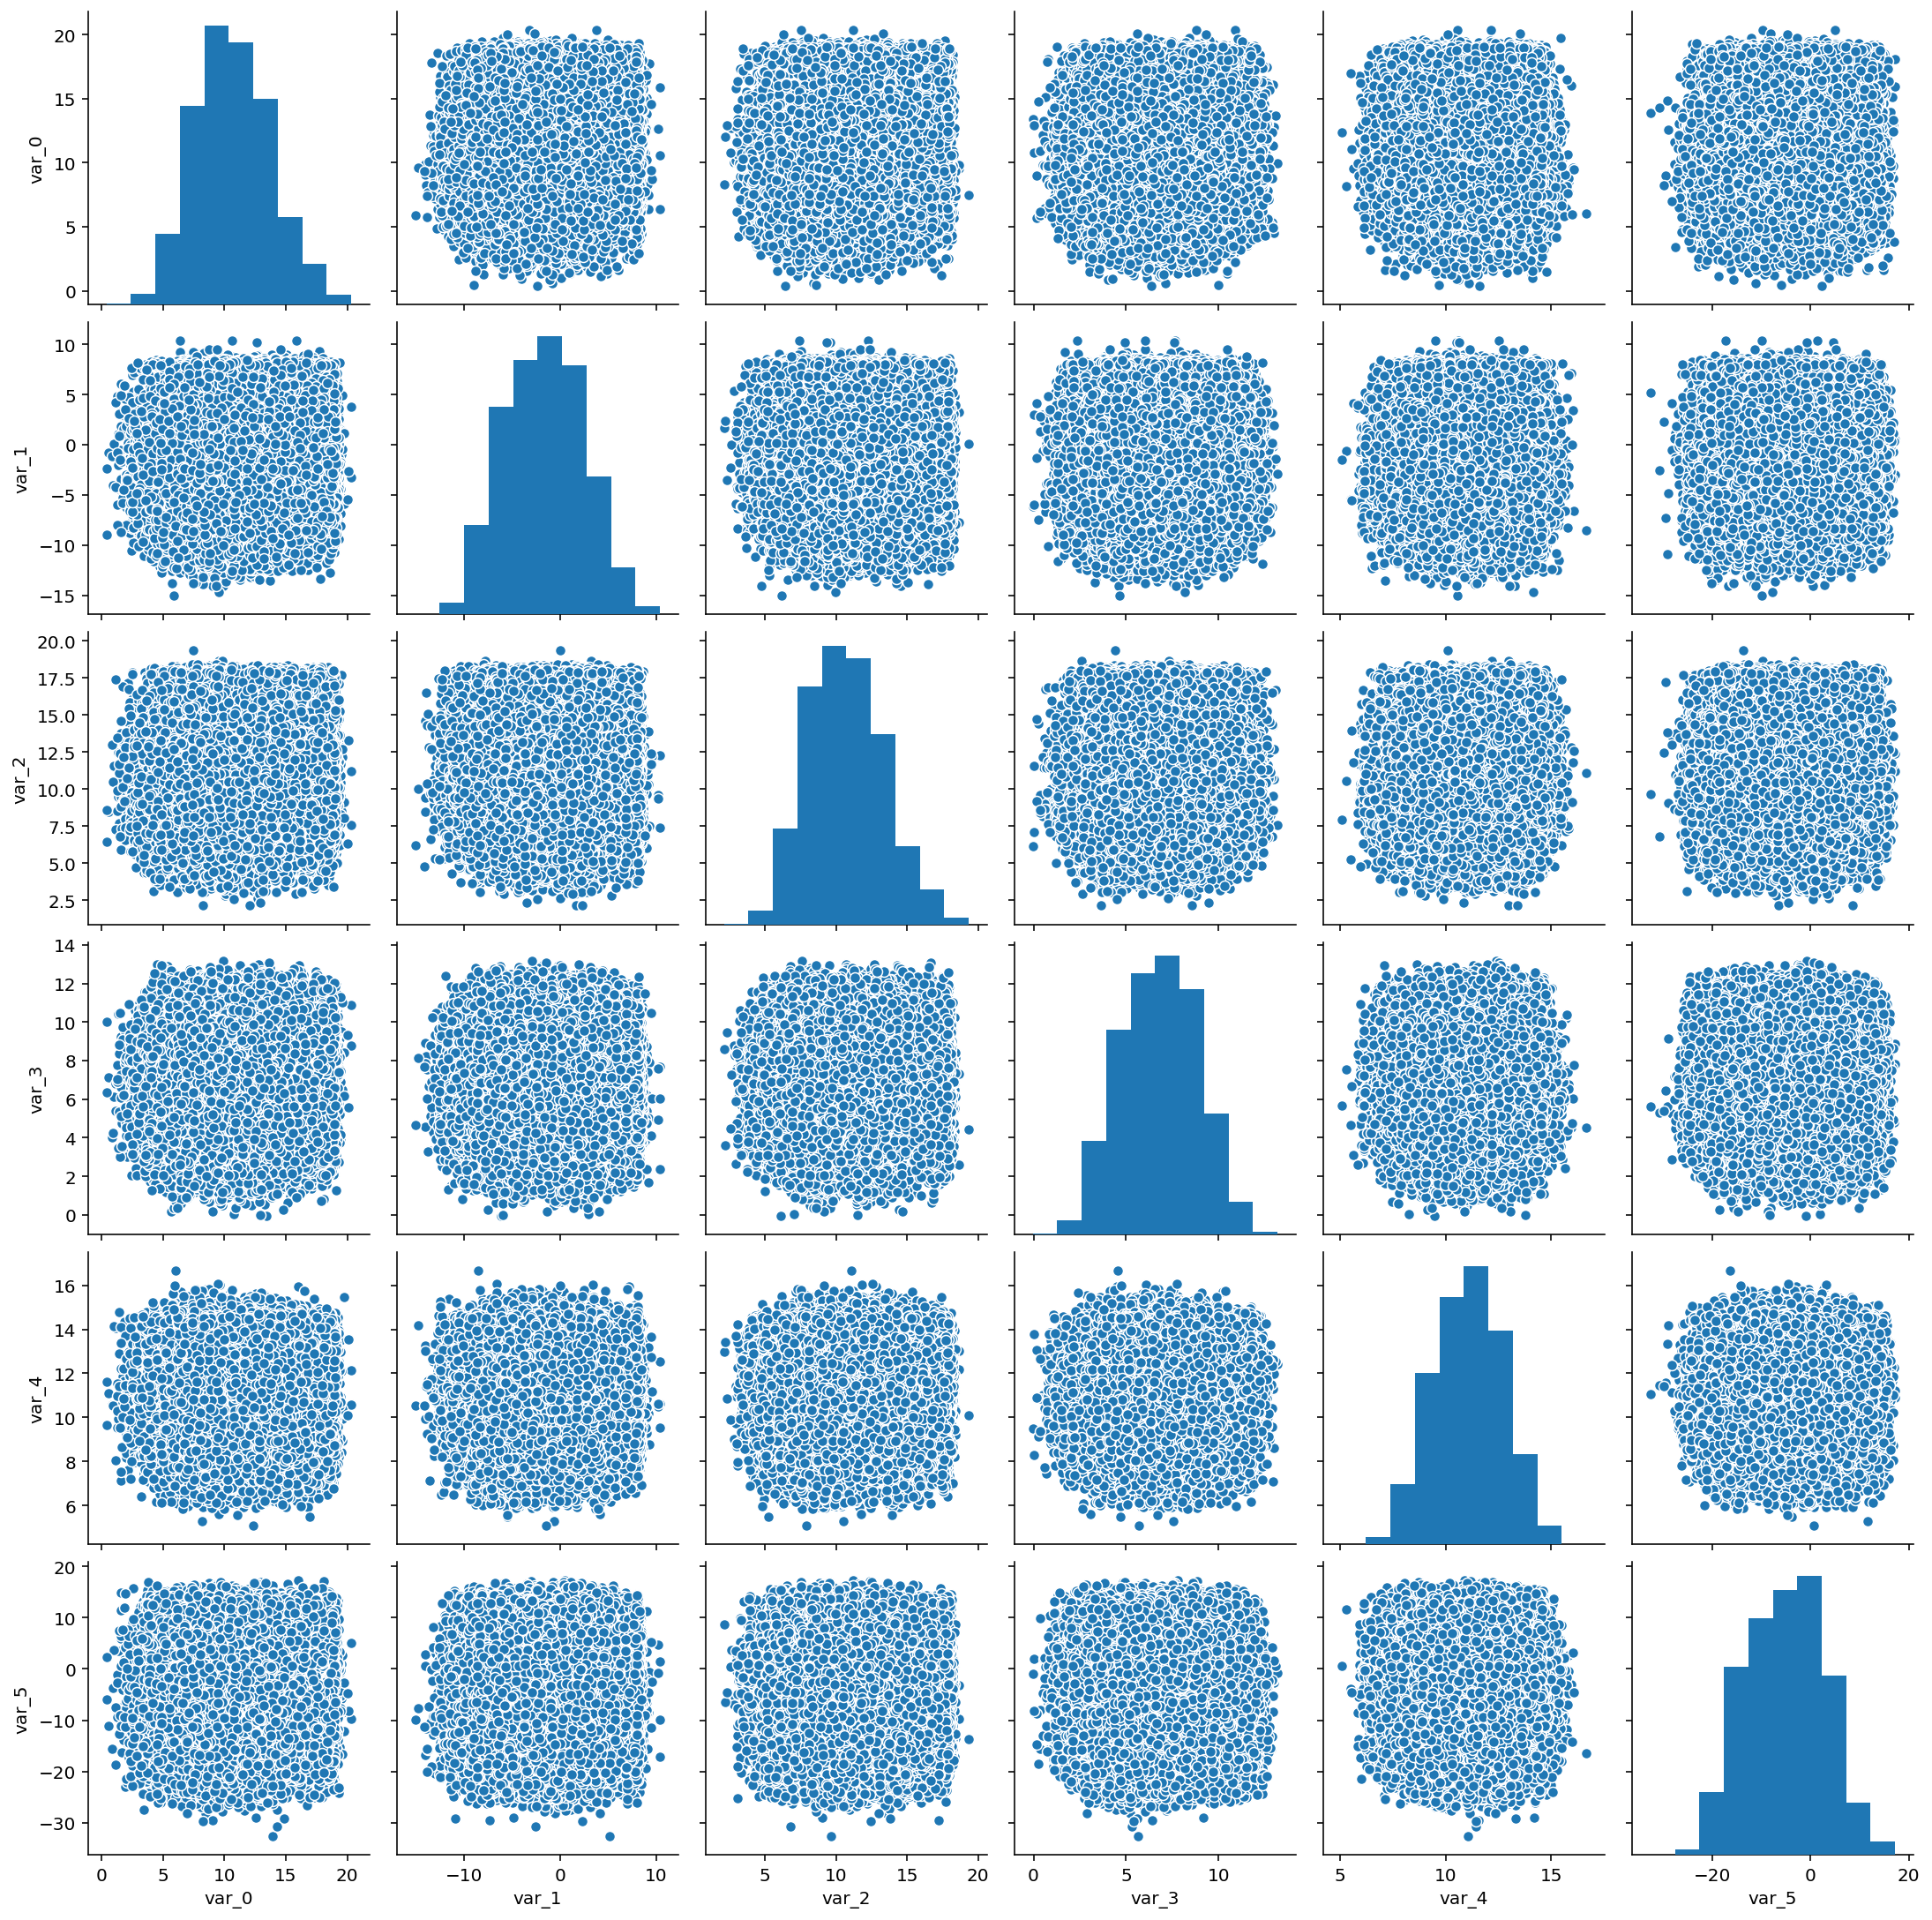

In [13]:
%config InlineBackend.figure_format = 'retina'
features = ['var_0', 'var_1','var_2','var_3', 'var_4', 'var_5']

train_sub = train[features]
sns.pairplot(train_sub)


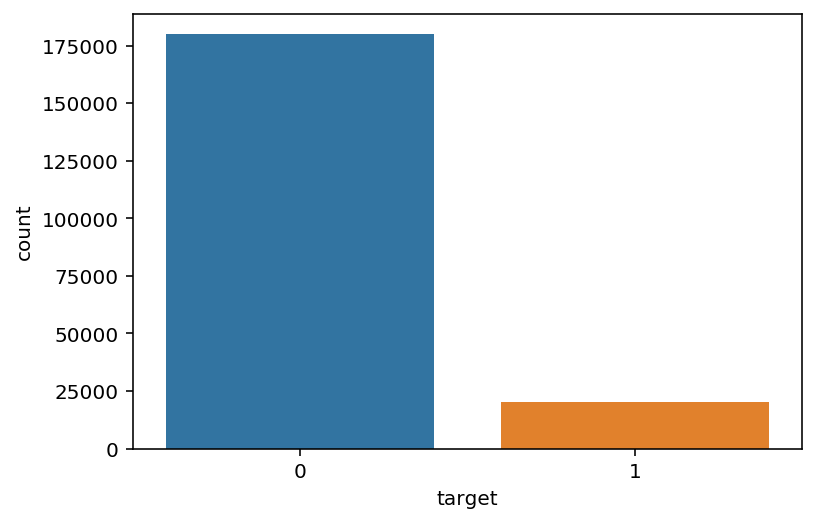

In [15]:
%config InlineBackend.figure_format = 'retina'

sns.countplot(x= "target", data=train)

In [16]:
t0 = train.loc[train['target'] == 0].drop(['target'], axis=1)
t1 = train.loc[train['target'] == 1].drop(['target'], axis=1) 
features = t0.columns.values[1:51]
t0.columns.values[1]
x = features.shape[0]
rows = np.int((np.ceil(x/5.0)))

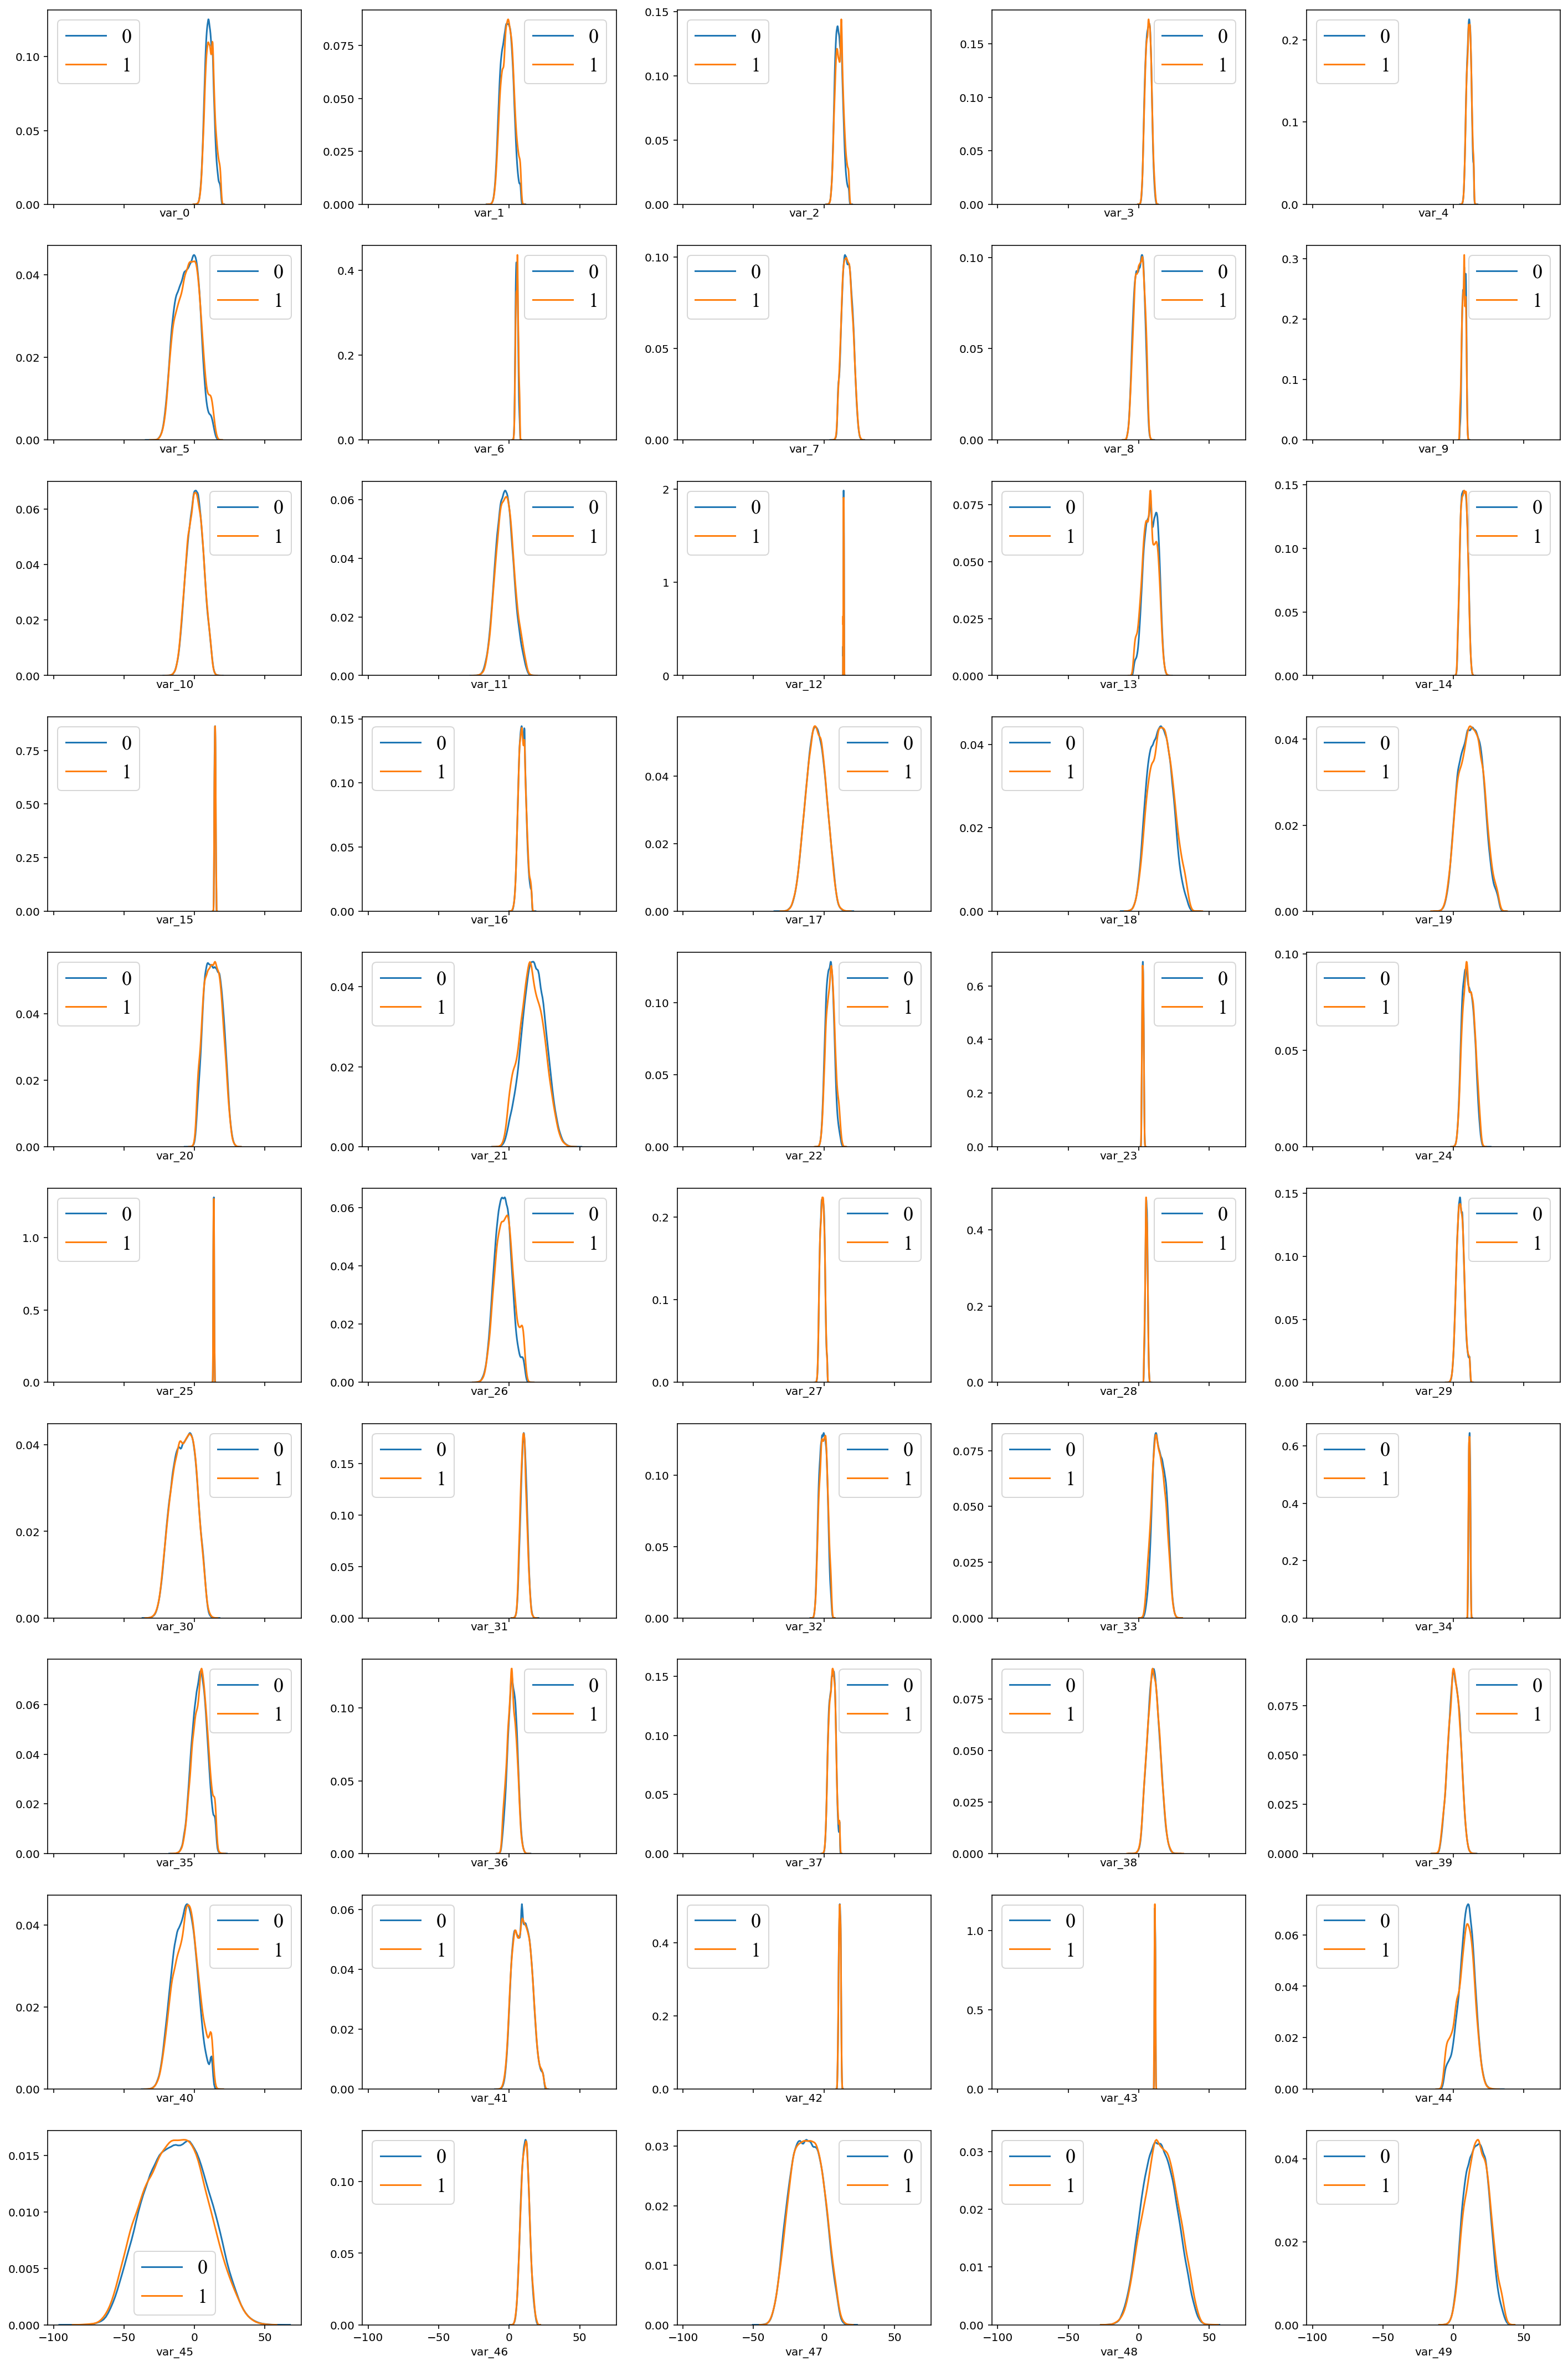

In [17]:
%config InlineBackend.figure_format = 'retina'
f, axes = plt.subplots(rows, 5, figsize=(20, rows * 3), sharex=True)

font = {'family' : 'Times new roman',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)
for i, ax in enumerate(axes.flatten()):
    sns.kdeplot(t0.iloc[:, i+1], Label='0', ax=ax)
    sns.kdeplot(t1.iloc[:, i+1], Label='1', ax=ax)
    ax.set_xlabel(features[i])
#     ax.legend(fontsize=18)
plt.tight_layout()

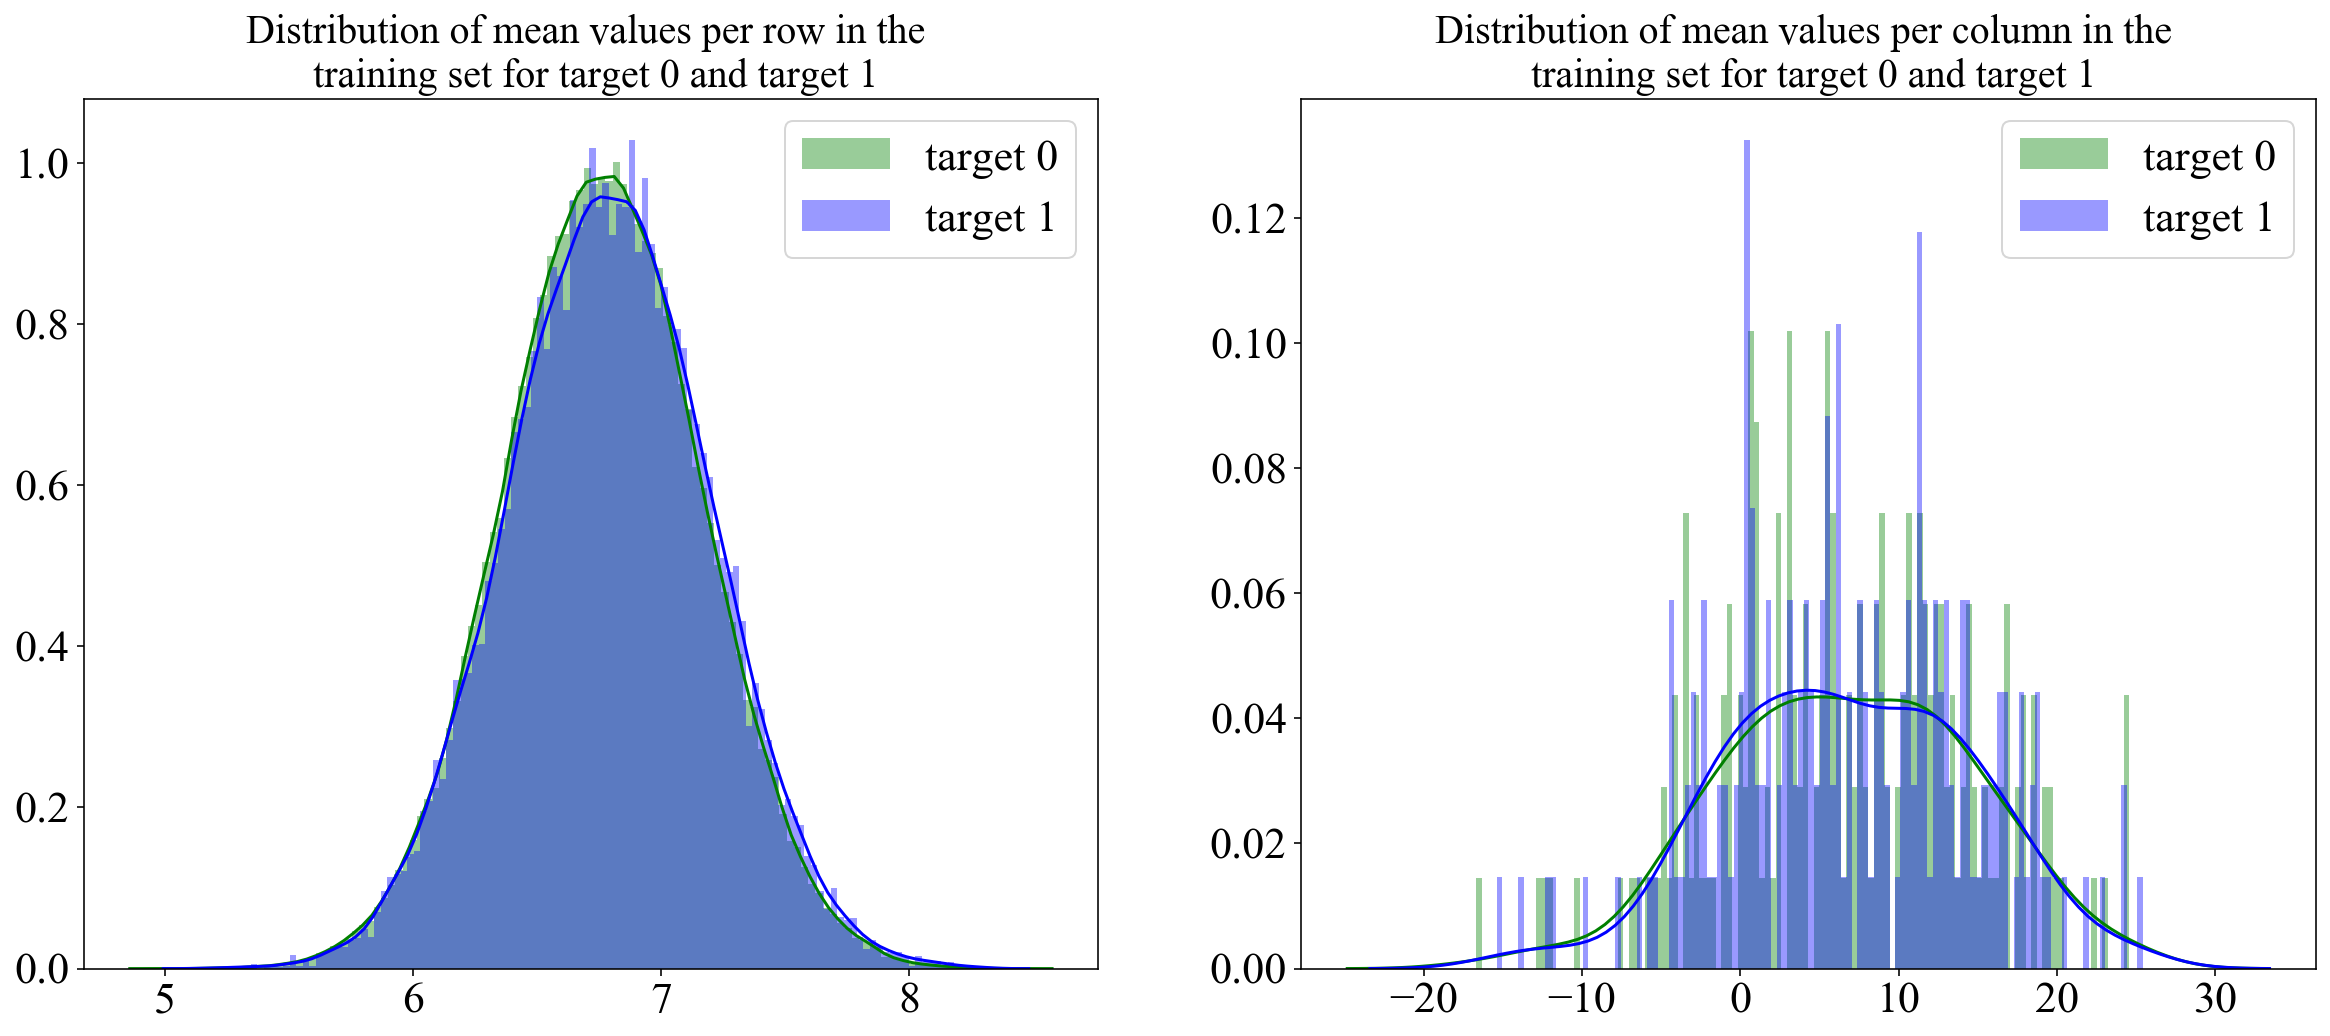

<Figure size 432x288 with 0 Axes>

In [18]:
%config InlineBackend.figure_format = 'retina'

font = {'family' : 'Times new roman',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

f, axes = plt.subplots(1, 2, figsize=(20, 8))
#features = train.columns.values[2:202]

sns.distplot(t0.mean(axis=1),color="green", kde=True,bins=120, label='target 0', hist_kws={"alpha" : 0.4}, ax=axes[0])
sns.distplot(t1.mean(axis=1),color="blue", kde=True,bins=120, label='target 1', hist_kws={"alpha" : 0.4}, ax=axes[0])
axes[0].set_title("Distribution of mean values per row in the \n training set for target 0 and target 1", fontsize=20)
axes[0].legend()

sns.distplot(t0.mean(axis=0),color="green", kde=True,bins=120, label='target 0', hist_kws={"alpha" : 0.4}, ax=axes[1])
sns.distplot(t1.mean(axis=0),color="blue", kde=True,bins=120, label='target 1', hist_kws={"alpha" : 0.4}, ax=axes[1])
axes[1].set_title("Distribution of mean values per column in the \n training set for target 0 and target 1", fontsize=20)
axes[1].legend()
plt.show()
plt.tight_layout()

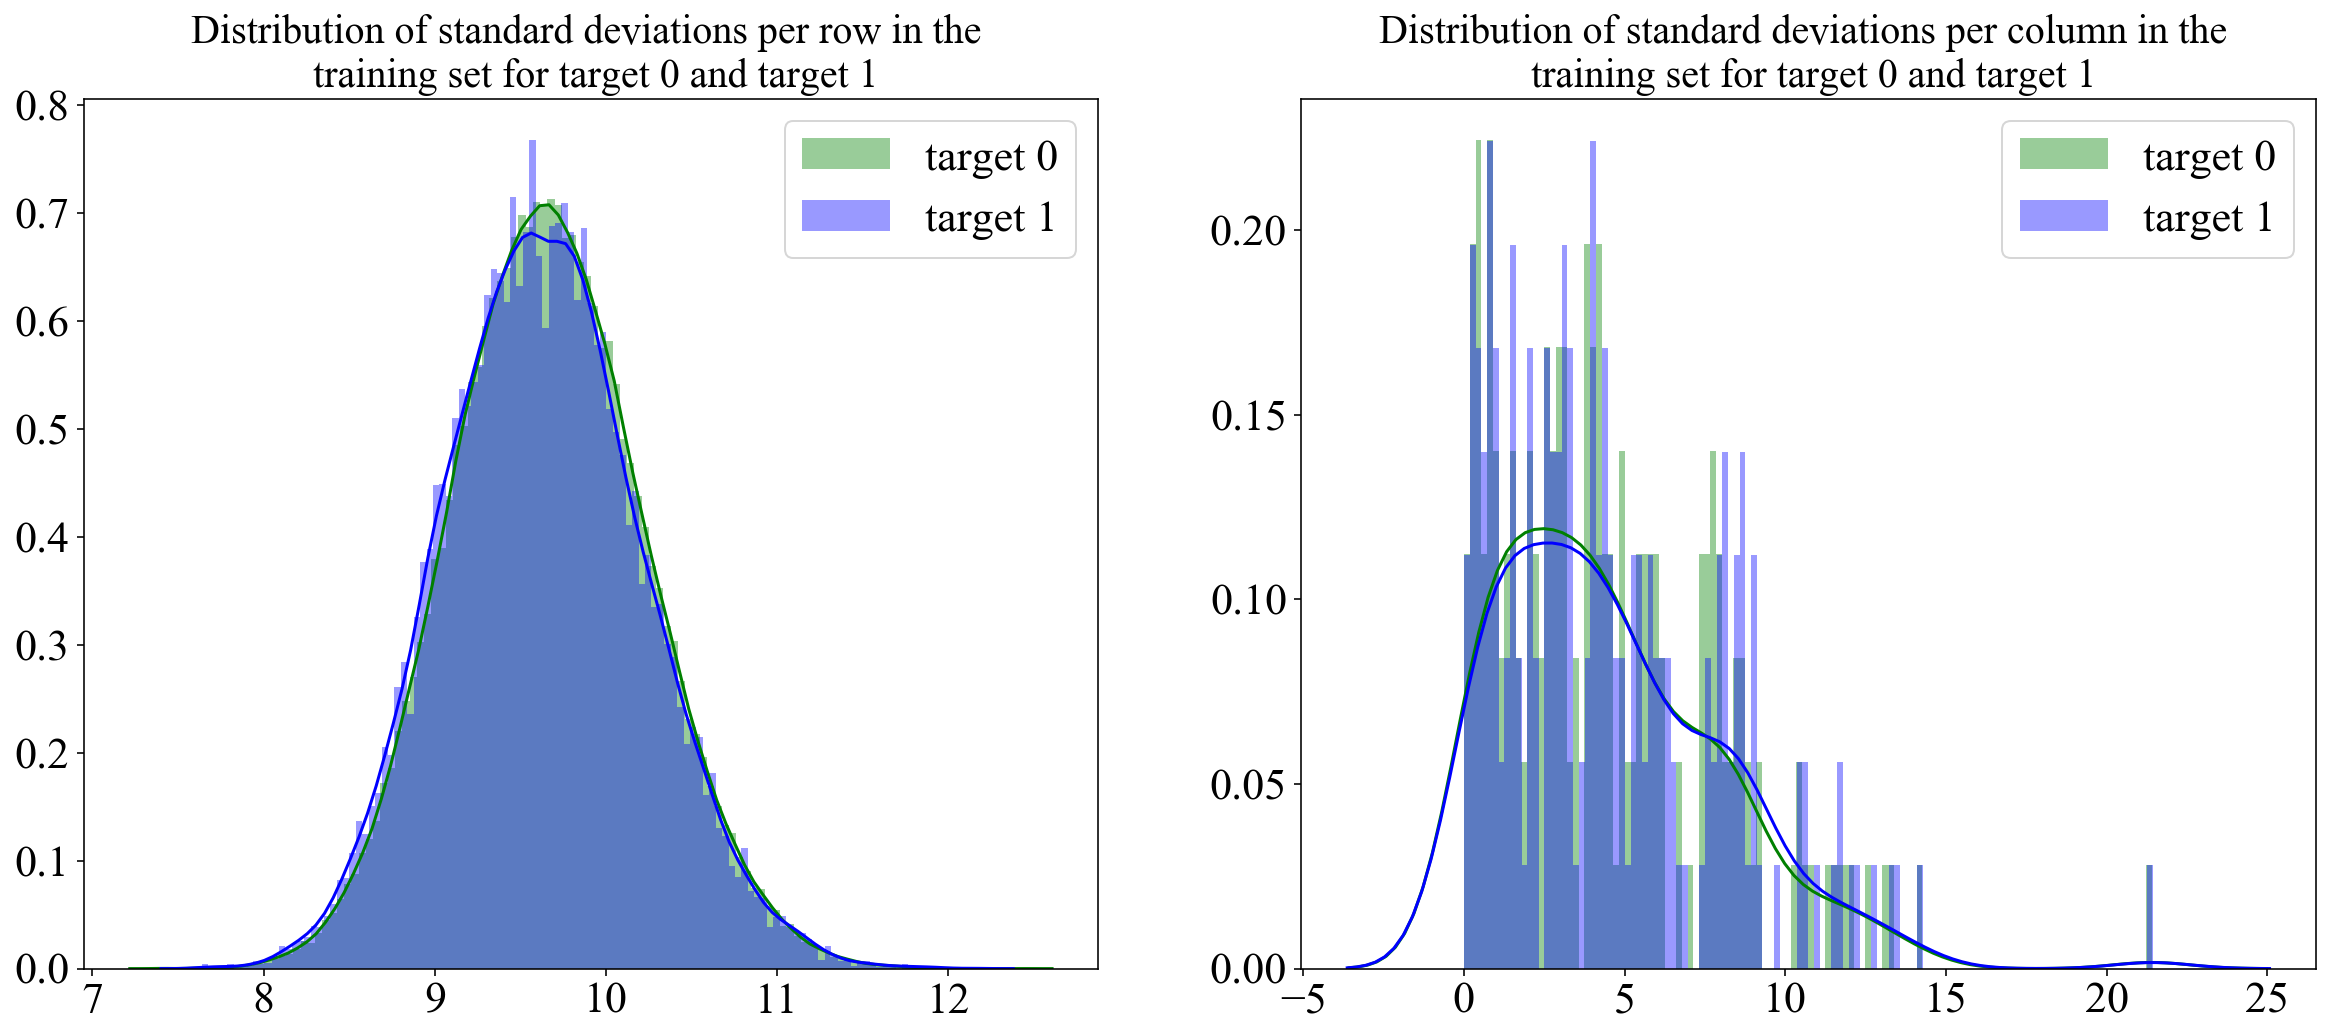

<Figure size 432x288 with 0 Axes>

In [19]:
%config InlineBackend.figure_format = 'retina'

font = {'family' : 'Times new roman',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

f, axes = plt.subplots(1, 2, figsize=(20, 8))
#features = train.columns.values[2:202]

sns.distplot(t0.std(axis=1),color="green", kde=True,bins=120, label='target 0', hist_kws={"alpha" : 0.4}, ax=axes[0])
sns.distplot(t1.std(axis=1),color="blue", kde=True,bins=120, label='target 1', hist_kws={"alpha" : 0.4}, ax=axes[0])
axes[0].set_title("Distribution of standard deviations per row in the \n training set for target 0 and target 1", fontsize=20)
axes[0].legend()

sns.distplot(t0.std(axis=0),color="green", kde=True,bins=120, label='target 0', hist_kws={"alpha" : 0.4}, ax=axes[1])
sns.distplot(t1.std(axis=0),color="blue", kde=True,bins=120, label='target 1', hist_kws={"alpha" : 0.4}, ax=axes[1])
axes[1].set_title("Distribution of standard deviations per column in the \n training set for target 0 and target 1", fontsize=20)
axes[1].legend()
plt.show()
plt.tight_layout()

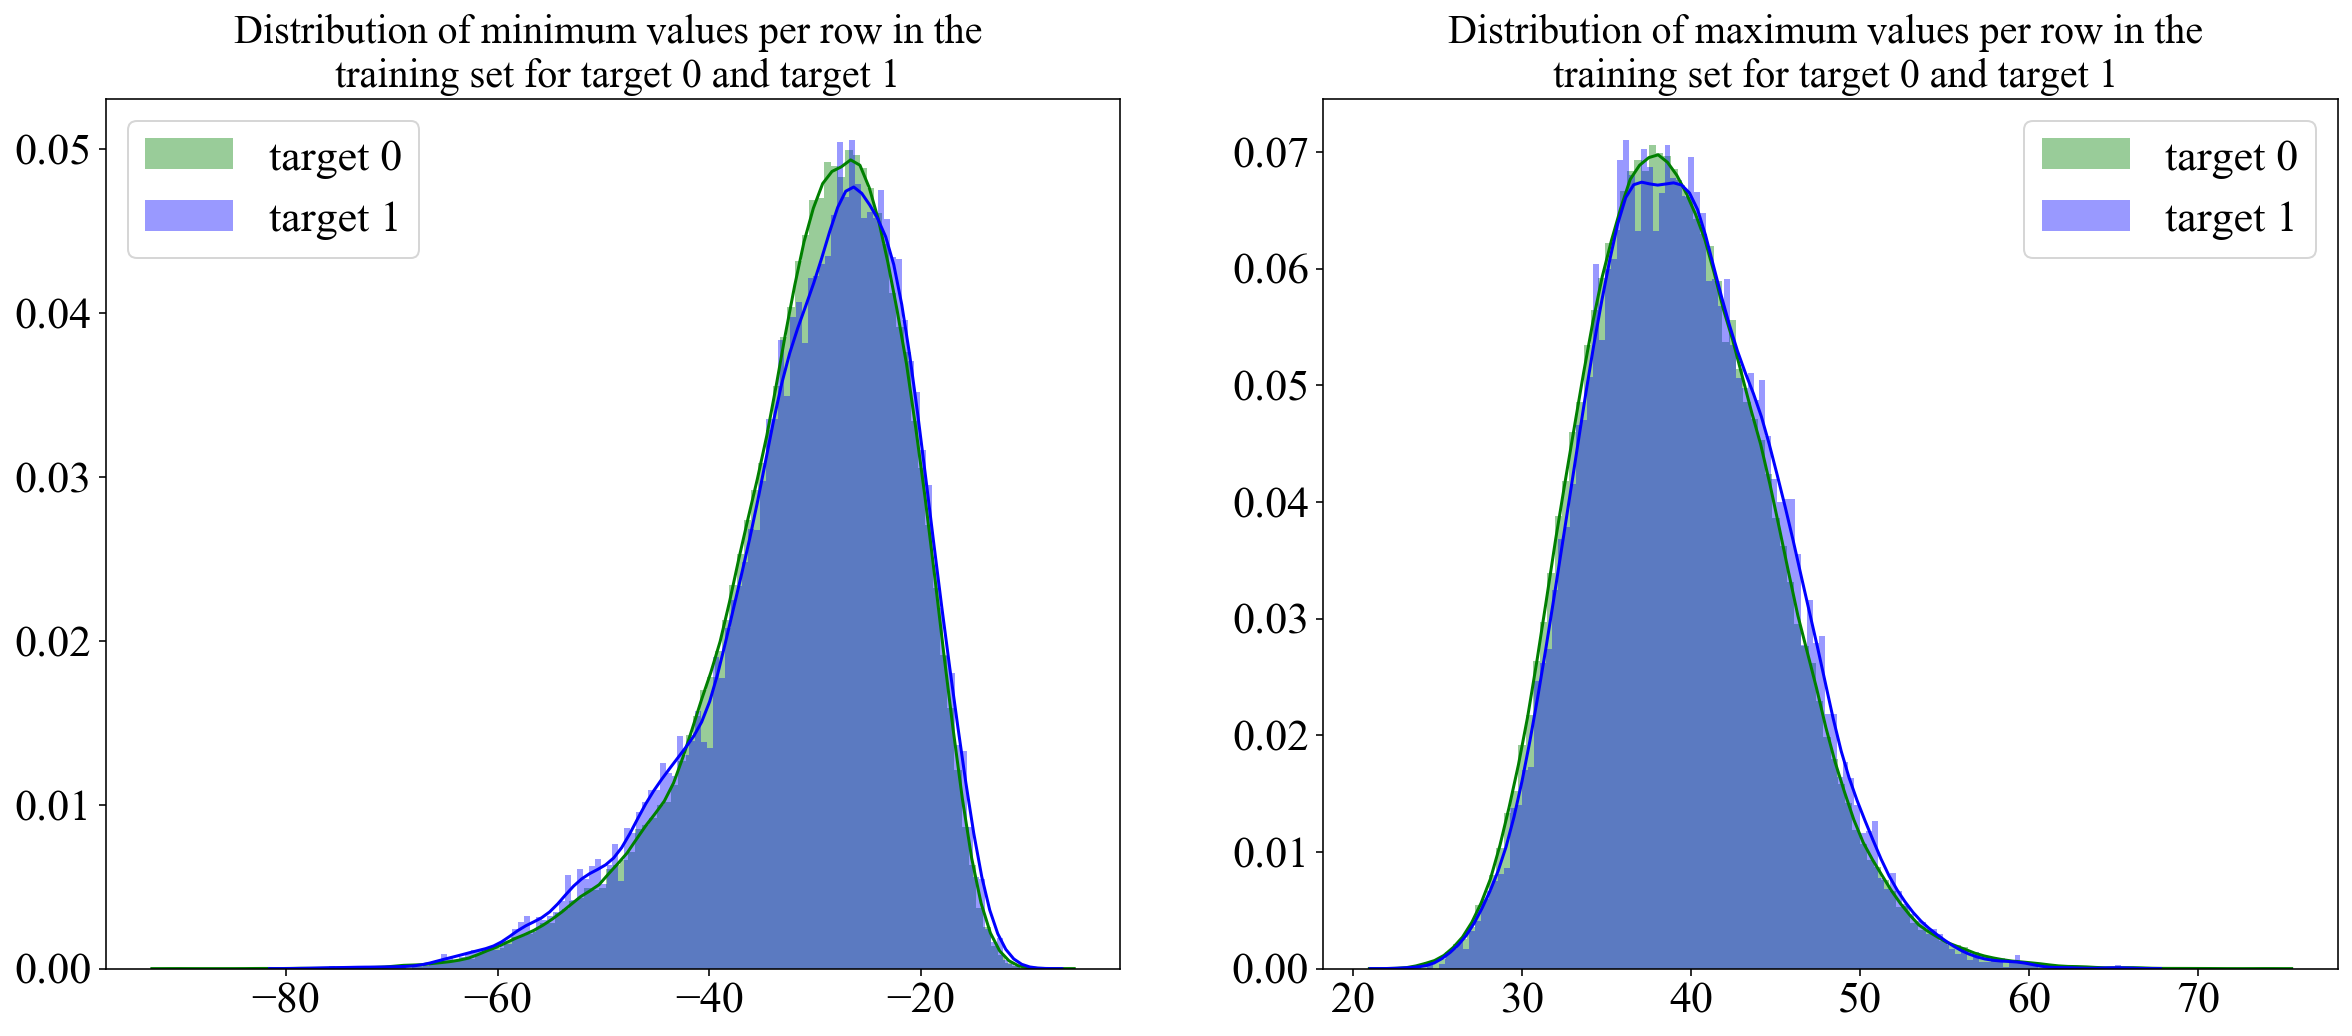

<Figure size 432x288 with 0 Axes>

In [20]:
%config InlineBackend.figure_format = 'retina'

font = {'family' : 'Times new roman',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

f, axes = plt.subplots(1, 2, figsize=(20, 8))
#features = train.columns.values[2:202]

sns.distplot(t0.min(axis=1),color="green", kde=True,bins=120, label='target 0', hist_kws={"alpha" : 0.4}, ax=axes[0])
sns.distplot(t1.min(axis=1),color="blue", kde=True,bins=120, label='target 1', hist_kws={"alpha" : 0.4}, ax=axes[0])
axes[0].set_title("Distribution of minimum values per row in the \n training set for target 0 and target 1", fontsize=20)
axes[0].legend()

sns.distplot(t0.max(axis=1),color="green", kde=True,bins=120, label='target 0', hist_kws={"alpha" : 0.4}, ax=axes[1])
sns.distplot(t1.max(axis=1),color="blue", kde=True,bins=120, label='target 1', hist_kws={"alpha" : 0.4}, ax=axes[1])
axes[1].set_title("Distribution of maximum values per row in the \n training set for target 0 and target 1", fontsize=20)
axes[1].legend()
plt.show()
plt.tight_layout()

In [21]:
%%time
correlations = train[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlation = correlations[correlations.index % 2 != 0].reset_index()
correlation.tail()

CPU times: user 708 ms, sys: 24.1 ms, total: 732 ms
Wall time: 779 ms


index level_0 level_1         0
1220   2441  var_33  var_26  0.006999
1221   2443  var_13  var_23  0.007298
1222   2445  var_13  var_44  0.007843
1223   2447  var_48  var_26  0.007992
1224   2449  var_13   var_2  0.008795

In [78]:
features = t0.columns.values[1:202]
duplicate = []
# dups_shape = train['var_68'].nunique()
for fea in features:
    dups_shape = train.pivot_table(index=[fea], aggfunc='size')
    duplicate.append([fea, dups_shape.max(), dups_shape.idxmax()])


In [89]:
duplicate_df = pd.DataFrame(duplicate,columns=['Features', 'Max_duplicates', 'Value'])
np.transpose(duplicate_df.sort_values(by = 'Max_duplicates', ascending=False).head(20))

68       108      126      12      91       103      148  \
Features        var_68  var_108  var_126   var_12  var_91  var_103  var_148   
Max_duplicates    1084      313      305      203      66       61       59   
Value           5.0214  14.1999  11.5356  13.5545  6.9537   1.6662   4.0456   

                   71       161      25       125      169      166      133  \
Features        var_71  var_161   var_25  var_125  var_169  var_166  var_133   
Max_duplicates      54       52       41       40       39       39       39   
Value           0.7031   5.7688  13.6723  12.5159   5.6941   2.7306   6.6803   

                    43       15       131      93      23       34   
Features         var_43   var_15  var_131   var_93  var_23   var_34  
Max_duplicates       39       34       33       32      32       30  
Value           11.4522  14.6482   0.3544  10.5246  2.9116  11.1229

# 4. Feature Selection

* [Feature selection algorithms](https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/) help to determine which features significantly influence the output variable and then eliminate the remaining  features from consideration. This step was useful as this dataset has large number of features, being able to eliminate features that have little to no impact on the analysis reduced the complexity of the model and enabled machine learning algortihms to train faster. 

* The scikit module provides [several ways](https://scikit-learn.org/stable/modules/feature_selection.html) for identifying significant features either by evaluating the statistical correlation with the outcome variable (e.g. univariate feature selection method) or by measuring  the usefulness of a subset of feature by actually training a machine learning model on it (e.g. recursive feature elimination). 

* Considering the size of this particular dataset and the computational time usually required for recursive feature elimination, the universal feature seleciton method was adopted to select the top 25 features that are critical for modeling. Later, submissions were also made by selecting top 50, 100 and 150 features to check the effect of feature selection on accuracy and time required for computation.

* **Define Target Variable and Test Variables for Modeling**

In [3]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

feature_data = train.drop(columns=['target','ID_code'],axis=1)
target_data = train['target']
X_train, X_test, y_train, y_test = train_test_split(
    feature_data, target_data, test_size=0.3, random_state=40)
X_train

var_0   var_1    var_2    var_3    var_4    var_5   var_6    var_7  \
143414  11.9421  0.8907  14.9576   9.3168   8.0225 -15.2528  6.1546  12.4726   
148234  15.2109 -4.1274  17.3958   6.3323   8.3099 -13.0204  5.4810  18.5663   
13      16.3699  1.5934  16.7395   7.3330  12.1450   5.9004  4.8222  20.9729   
72779   10.7032 -3.4477   8.0603   8.7403   9.8937  -7.9706  5.9030  13.9560   
32225    9.6003  2.7803   8.7919   5.3854  10.7623   4.0564  6.7740  16.7844   
...         ...     ...      ...      ...      ...      ...     ...      ...   
56760    7.7224 -5.3365  11.7861  11.7464   8.3933  -2.0015  4.8895  14.5429   
93176   14.8401 -5.3298  11.9953   5.2353  12.7303   1.9826  5.1159  13.3013   
30727    9.5414 -7.8310  12.4435   5.1961   7.9476  -3.5075  5.2249  19.2976   
112859   6.6686  2.2621   7.4169   6.1965  13.4081  -7.7563  5.1636  15.7784   
142662  12.7888  3.0270  14.4534   5.0667  10.5331   0.8771  4.4721  17.5793   

         var_8   var_9  ...  var_190  var_191  var_192  var_193  var_194  \
143414  4.9690  9.0118  ...   9.3840  10.8688   1.9262   2.9839  13.8562   
148234 -7.4281  6.5040  ...   1.2105   1.7684   2.1483   0.8800  17.5329   
13      1.1064  8.6978  ...   7.4002   7.4031   4.3989   4.0978  17.3638   
72779   2.3753  9.6517  ...  -1.8141   4.6766   0.3622  11.2631  18.8091   
32225   3.9406  6.7170  ...   3.3870  10.5250   2.8899   3.7861  18.6122   
...        ...     ...  ...      ...      ...      ...      ...      ...   
56760  -0.1766  8.2212  ...   5.1790   9.8267   1.9105   3.7240  19.8302   
93176   2.1612  7.9668  ...   7.7025   8.6347   3.1616  10.5823  14.4526   
30727   5.2357  8.1934  ...  16.5767   9.3892   3.6800  -1.5140  20.8788   
112859 -2.1691  5.9739  ...   1.1342   7.7067   2.5304   5.7183  14.8254   
142662 -1.3646  6.0848  ...   3.1976   6.6919   2.8855   4.9198  18.2407   

        var_195  var_196  var_197  var_198  var_199  
143414   1.0816   2.4677  10.3967  20.1808  -5.0766  
148234  -0.0529  -3.5765   9.0103  21.2750 -15.8408  
13      -1.3022   9.6846   9.0419  15.6064 -10.8529  
72779   -2.1865   6.0315   9.0455  12.0720 -14.2330  
32225    1.0941   6.7398   8.7889  16.8993   8.6394  
...         ...      ...      ...      ...      ...  
56760    1.2599  -4.1866  10.5726  11.9020  -9.7126  
93176   -0.3138   3.1958   9.3398  14.1641  12.9618  
30727   -0.7029   7.4325   8.7746  22.3645  -2.1456  
112859  -2.8251  10.0761   8.9556  12.2295 -10.8085  
142662  -2.2021   2.2390   7.6573  20.3075 -14.3173  

[140000 rows x 200 columns]

* **Select Features to be Considered for Modeling**

In [4]:
selector = SelectKBest(f_classif, k=50)
X_new=selector.fit_transform(X_train, y_train)
mask = selector.get_support(indices=True)
colname = X_train.columns[mask]# Names of the selected columns
scores = -np.log10(selector.pvalues_)

In [5]:
# def plot_joint_plot(df, feature, target):
#     j = sns.jointplot(feature, target, data = df, kind = 'reg')
#     j.annotate(stats.pearsonr)
    
#     return plt.show()

In [6]:
pearson_r = []

for column in X_train.columns:
    corr_tuple = stats.pearsonr(X_train[column], y_train)
    pearson_r.append([column, corr_tuple[0], corr_tuple[1]])

In [7]:
corr_df = pd.DataFrame(pearson_r, columns = ['Features', 'Correlation', 'P_value' ])
corr_df.head(5)

Features  Correlation       P_value
0    var_0     0.052784  6.142733e-87
1    var_1     0.050622  4.169554e-80
2    var_2     0.055541  4.585945e-96
3    var_3     0.009668  2.975807e-04
4    var_4     0.011409  1.963650e-05

In [8]:
corr_df.sort_values(by = ['P_value'], inplace=True)
corr_df.head(5)

Features  Correlation        P_value
81    var_81    -0.080535  4.072974e-200
139  var_139    -0.074503  1.760894e-171
12    var_12    -0.070040  9.618970e-152
6      var_6     0.068136  1.074488e-143
53    var_53     0.065917  1.357586e-134

* **Redifining Train and  Test Data Using the Selected Features** 

In [9]:
X_train_new = X_train[colname]
X_test_new = X_test[colname]


# 5. Train Different Classification Models using Selected Features

* All models (KNN, Logistic Regresson, Decision Tree,XGBoost and Random Forest) were trained using the train dataset with selected features. 
* To estimate the accuracy of these models when applied to unseen data, cross validation was performed for each model by splitting the train dataset (80%/20% for train/test split), fitting the model and computing the score 5 consecutive times (with different splits each time) based on ROC_AUC score. The mean of the accuracies for the 5 trials were then reported as the CV score for each model.

* **Defining models**

In [15]:
#Random Forest, Decision Tree, Logistic Regression and K Nearest Neighbours, and XGBoost models
RFmodel=RandomForestClassifier(random_state=1)
DTmodel=DecisionTreeClassifier(random_state=1)
logreg = LogisticRegression(solver='newton-cg', max_iter=1000)
knn = KNeighborsClassifier(n_neighbors = 3)
xgbm = xgb.XGBClassifier(silent=True, scale_pos_weight=1,learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

* **Training the Models**

In [16]:
# RFmodel.fit(X_train_new, y_train)
# print("RF done")

DTmodel.fit(X_train_new, y_train)
print("DT done")

logreg.fit(X_train_new, y_train)
print("logreg done")

knn.fit(X_train_new, y_train)
print("knn done")

xgbm.fit(X_train_new, y_train)
print("xgbm done")

DT done
logreg done
knn done
xgbm done


* **Calculating Cross Validation Scores**

In [17]:
#define a function that can be called to calculate cross validation score for each model 
def cross_val(X,x,y):
    scores = cross_val_score(X, x, y, cv=5, scoring = "roc_auc")
    return scores.mean()

In [20]:
#Calculate Cross Validation Score based on ROC_AUC by calling th ecross_val function defined before 
RF_score = round(cross_val(RFmodel, X_train_new, y_train) * 100, 2)
print("RF done")
DT_score =round(cross_val(DTmodel, X_train_new, y_train) * 100, 2)
print("DT done")
logreg_score = round(cross_val(logreg, X_train_new, y_train) * 100, 2)
print("logreg done")
knn_score = round(cross_val(knn, X_train_new, y_train) * 100, 2)
print("knn done")
xgb_score = round(cross_val(xgbm,X_train_new, y_train) * 100, 2)
print("xgb done")


RF done
DT done
logreg done
knn done
xgb done


In [22]:
RF_score

69.36

* **Tabulating the CV Scores for Different Models** 

In [21]:
results = pd.DataFrame({'Model': ['XGB',  'Logistic Regression', 'Random_Forest','KNN','DT'
              ],'Score': [xgb_score , logreg_score,RF_score,knn_score,DT_score]})
results = results.sort_values(['Score'], ascending=[False])
results.head()

Model  Score
0                  XGB  83.42
1  Logistic Regression  80.84
2        Random_Forest  80.29
4                   DT  56.72
3                  KNN  54.48

# 6. Hyperparameter Tuning for Logistic Regression

Results from the previous step shows that XGBoost and Logistic Regression have the best CV scores (this was also found to be true when the iteration was repeated with 50,100 and 150 features). To reduce the possibility of overfitting, the GridSearchCV method from scikit is used to perform a hyper-paramter optimization on these two models to check if it improves the accuracy of prediction. Below is the code used for a hyperparamter search for logistic regression.

* **Grid Search to Optimize the Parameters** 

In [27]:
grid={"C":np.logspace(-2,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg1=LogisticRegression()
logreg_hp=GridSearchCV(logreg1,grid,cv=3,verbose=0)
logreg_hp.fit(train_X_new,train_Y)

print("tuned hpyerparameters :(best parameters) ",logreg_hp.best_params_)
print("accuracy :",logreg_hp.best_score_)


/Users/prguser/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/prguser/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/prguser/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/prguser/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/prguser/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

KeyboardInterrupt: 

* **Modeling with the Best Parameters from GridSearch**

In [31]:
logreg2=LogisticRegression(C=1000,penalty="l2")#Grid Search Result  C:1000 l2 Accuracy :0.902095
logreg2.fit(train_X_new,train_Y)
logreg2_score = round(cross_val(logreg2,train_X_new, train_Y) * 100, 2)
print("Accuracy for logical regression after doing a GridSearchCV: ", logreg2_score)

Accuracy for logical regression after doing a GridSearchCV 75.36


# 7. Hyperparameter Tuning for XGBoost

*The code below is commented out as Kaggle timed out before the grid search is complete for these paramters. 

In [ ]:
#xgbm_h = xgb.XGBClassifier(silent=False, scale_pos_weight=1,learning_rate=0.01, colsample_bytree = 0.4,subsample = 0.8,objective='binary:logistic', 
                    n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)


#params = {
#        'min_child_weight': [1, 5, 10],
#        'gamma': [0.5, 1, 1.5, 2, 5],
#        'subsample': [0.6, 0.8, 1.0],
#        'colsample_bytree': [0.6, 0.8, 1.0],
#        'max_depth': [3, 4, 5]
        }

#xgbm_hp= GridSearchCV(estimator =  xgbm, param_grid = params, scoring='roc_auc',n_jobs=1,iid=False, cv=3)
#xgbm_hp.fit(train_X_new,train_Y)
#xgbm_hp.best_params_, xgbm_hp.best_score_


* **Training XGB Model with Best Parameters from GridSearch **

In [ ]:
#xgbm2 = xgb.XGBClassifier(silent=1, 
#                      scale_pos_weight=1,
#                     learning_rate=0.01,  
#                      colsample_bytree = 0.4,
#                      subsample = 0.8,
#                      objective='binary:logistic', 
#                      n_estimators=1000, 
#                      reg_alpha = 0.3,
#                      max_depth=4, 
#                      gamma=10)
#xgbm2.fit(train_X_new,train_Y)
#xgb2_score = round(cross_val(xgbm2,train_X_new, train_Y) * 100, 2)

# 8. Prediction on Test Data using the Best Performing Model

In [ ]:
#Comment out the models you wont use in this iteration
#logreg_pred = logreg.predict_proba(test_X_new)[:,1]
#logreg2_pred = logreg2.predict_proba(test_X_new)[:,1]
xgb_pred =xgbm.predict_proba (test_X_new)[:,1]
#xgb2_pred =xgbm2.predict_proba (test_X_new)[:,1]


# 8. Generate Output File for Submission

In [ ]:
#The lines below shows you how to save your data in the format needed to score it in the competition
output = pd.DataFrame({'ID_code': test.ID_code,
                      'target': xgb_pred})

output.to_csv('submission.csv', index=False)